# DS 310 HW 5
## Author: Jess Strait

In [98]:
# Import useful packages
%reset
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [99]:
# Import and wrangle digit 5
five = pd.read_csv("digit_5.csv")
five = pd.DataFrame(five)
five['Label'] = -1
five.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [100]:
# Import and wrangle digit 6
six = pd.read_csv("digit_6.csv")
six = pd.DataFrame(six)
six['Label'] = 1
six.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
# Combine 5 and 6 labeled data and clean dataframe
numbers = five.append(six)
for column in numbers:
    numbers[column].fillna(0, inplace=True)
numbers.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.90196085.3,0.427451015,0.011764707,0.646,0.647,0.648,0.649,0.650,0.651,0.652
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# Select response and predicting variables
y = numbers['Label']
x = numbers.drop('Label', axis=1)

In [103]:
# Select 20% of data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=24)

In [104]:
# Create margin hyperparameters to be explored
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear']}

In [105]:
# Run randomized search cross validation with SVC() estimator
random_cv = RandomizedSearchCV(estimator=SVC(),
                               param_distributions=param_grid,
                               cv=4, n_iter=4, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=24)
# Fit cross validation to data
random_cv.fit(x_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    8.8s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=4, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'kernel': ['linear']},
                   pre_dispatch='2*n_jobs', random_state=24, refit=True,
                   return_train_score=True, scoring='accuracy', verbose=1)

In [110]:
# View results in order of accuracy performance
linear_df = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
linear_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.795030,0.039976,0.170151,0.016242,linear,1,"{'kernel': 'linear', 'C': 1}",1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,0.0
1,0.779601,0.029779,0.163574,0.007921,linear,10,"{'kernel': 'linear', 'C': 10}",1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,0.0
2,0.774853,0.031536,0.171829,0.009933,linear,100,"{'kernel': 'linear', 'C': 100}",1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,0.0
3,0.778269,0.025152,0.169889,0.011232,linear,1000,"{'kernel': 'linear', 'C': 1000}",1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,0.0


In [111]:
# Save best parameters as model
linear_model = random_cv.best_estimator_

In [112]:
# Conduct same task with RBF kernel
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma':[0.1, 0.3, 1, 10]}

In [113]:
# Use gridsearch CV to explore more comprehensive set of parameters
grid_search = GridSearchCV(estimator = SVC(), param_grid=param_grid, cv = 4, 
                           scoring = 'accuracy', verbose = 1,
                           n_jobs = -1, return_train_score = True)
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed: 47.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.3, 1, 10],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [114]:
# View results in order of accuracy performance
rbf = pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending = False)
rbf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
4,62.426761,0.110472,15.501766,0.084393,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.988948,0.989423,...,0.989904,0.990146,0.001293,1,1.0,1.0,1.0,1.0,1.0,0.0
8,51.651404,0.075536,13.003983,0.036443,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.988948,0.989423,...,0.989904,0.990146,0.001293,1,1.0,1.0,1.0,1.0,1.0,0.0
12,51.902604,0.103150,13.222648,0.099439,1000,0.1,rbf,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",0.988948,0.989423,...,0.989904,0.990146,0.001293,1,1.0,1.0,1.0,1.0,1.0,0.0
0,58.149654,0.113704,14.705480,0.035335,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.988948,0.988942,...,0.989904,0.990025,0.001375,4,1.0,1.0,1.0,1.0,1.0,0.0
5,56.128707,0.108064,17.234174,0.015764,10,0.3,rbf,"{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}",0.566555,0.578846,...,0.573558,0.574571,0.005152,5,1.0,1.0,1.0,1.0,1.0,0.0


In [115]:
# Save best parameters
rbf_model = grid_search.best_estimator_

In [116]:
# Fit SVM linear model using best parameters
linear_model.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [117]:
# Fit SVM RBF model using best parameters
rbf_model.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
# Make predictions for test set with both models
linear_pred = linear_model.predict(x_test)
rbf_pred = rbf_model.predict(x_test)

In [119]:
# Explore linear SVM classification report
classification_report(y_test, linear_pred)

'              precision    recall  f1-score   support\n\n          -1       1.00      1.00      1.00      1001\n           1       1.00      1.00      1.00      1080\n\n    accuracy                           1.00      2081\n   macro avg       1.00      1.00      1.00      2081\nweighted avg       1.00      1.00      1.00      2081\n'

In [120]:
# Explore RBF SVM classification report
classification_report(y_test, rbf_pred)

'              precision    recall  f1-score   support\n\n          -1       0.99      1.00      0.99      1001\n           1       1.00      0.99      0.99      1080\n\n    accuracy                           0.99      2081\n   macro avg       0.99      0.99      0.99      2081\nweighted avg       0.99      0.99      0.99      2081\n'

In [145]:
# View confusion matrices of both models
print(confusion_matrix(y_test, linear_pred))
print(confusion_matrix(y_test, rbf_pred))

[[1001    0]
 [   0 1080]]
[[1001    0]
 [  15 1065]]


In [128]:
# Extract C values and create misclassification rate from accuracy measure in linear model
linear_c_values = linear_df['param_C']
linear_error = 1- linear_df['mean_test_score']

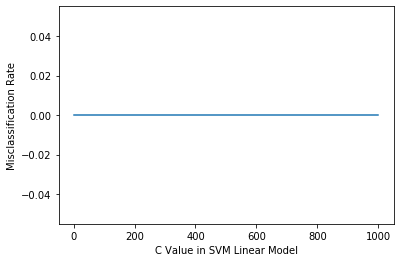

In [129]:
# Plot C values against misclassification rate with pyplot
plt.plot(linear_c_values, linear_error)
plt.ylabel('Misclassification Rate')
plt.xlabel('C Value in SVM Linear Model')
plt.show()

In [146]:
# Extract C values, gamma values, and create misclassification rate from accuracy measure in RBF model
# Save as dataframe for heatmapping
rbf_small = rbf[['param_C', 'param_gamma', 'mean_test_score']]
rbf_small['param_C'] = pd.to_numeric(rbf_small['param_C'])
rbf_small['param_gamma'] = pd.to_numeric(rbf_small['param_gamma'])
rbf_small['mean_test_score'] = 1 - pd.to_numeric(rbf_small['mean_test_score'])
rbf_small.head()

C:\Users\jessl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jessl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jessl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,param_C,param_gamma,mean_test_score
4,10,0.1,0.009854
8,100,0.1,0.009854
12,1000,0.1,0.009854
0,1,0.1,0.009975
5,10,0.3,0.425429


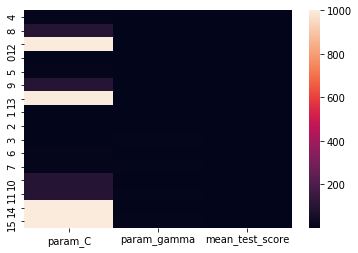

In [143]:
# Use seaborn heat mapping tool per instructions
sns.heatmap(rbf_small)

In [144]:
# Display overall error rate of SVM linear model
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_error_rate = 1 - linear_accuracy
linear_error_rate

0.0

In [147]:
# Display overall error rate of SVM RBF model
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_error_rate = 1 - rbf_accuracy
rbf_error_rate

0.007208073041806817